In [2]:
import numpy as np


In [87]:
@jit
def mc_step(config, beta):
    #suggest move
    # should we suggest many moves? 
    #alternatives include: take a row, take a column, take a random subset of points
    # randomly flip all points
    # 
    #E = H(config)
    i, j = np.random.randint(-1,N-1, size=2)
    
    #config[i,j] *= -1
    #Enew = H(config)
    dE = -1 * (config[i+1, j] + config[i, j-1]  + config[i-1, j]  + config[i, j-1]) * config[i,j]
    if dE < 0:
        return config
    elif  np.random.rand() < np.exp(-beta * dE):
        return config
    else:
        config[i,j] *= -1
        return config

    

In [112]:
N = 100
config = np.random.randint(0,2, size=(N,N))*2-1

ks = 2 * np.pi * np.arange(N) / N
kx, ky = np.meshgrid(ks,ks)
stencil = np.exp(1.j * kx) + np.exp(-1.j * kx) + np.exp(1.j * ky) + np.exp(-1.j * ky)
    
def H(config):
    #fast convolution method

    E = np.sum(config * np.fft.ifft2 (stencil * np.fft.fft2(config)))
    return E

def H2(config, neighbors):
    kx, ky = np.meshgrid()
    stencil = np.exp(1.j * kx) + np.exp(-1.j * kx) + np.exp(1.j * ky) + np.exp(-1.j * ky)
    E = np.sum(config * np.fft.ifft2 (stencil * np.fft.fft2(config)))
    return E


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


Downsample and scale

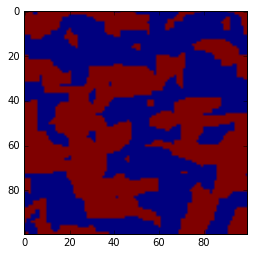

In [61]:
plt.imshow(config)

In [105]:
critT = 10.0


In [55]:
from numba import jit


In [113]:
@jit
def do_many_steps(config):
    for i in range(N*N*N):
        config = mc_step(config, 1.0/critT)
    return config

In [120]:
config = do_many_steps(config)

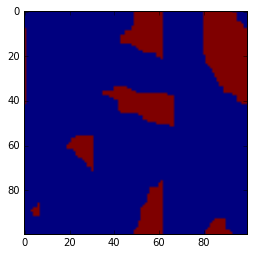

In [121]:
plt.imshow(config)

If we are doing conformal transformations, it would be convenient to work on the sphere, since we have the nice stereographic projection to work with. But then there is a question of how to discretize the sphere. Should the coupling parameters depend on the scaling factor associated with the stereographic projection?
Or... We could work with conformal trasnfromations on the torus, which I don't really know how to do.

Given a symmettry of the theory, how can we use this fact in a monte carlo setting? Reduction of configuration space?
Collecting statistics of symmettry related pieces to lessen sampling requirements?
Change monte carlo suggestion procedure?